<a href="https://colab.research.google.com/github/PerdomoVergaraFernando/simulacion/blob/main/EJERCICIOS_2DO_PARCIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

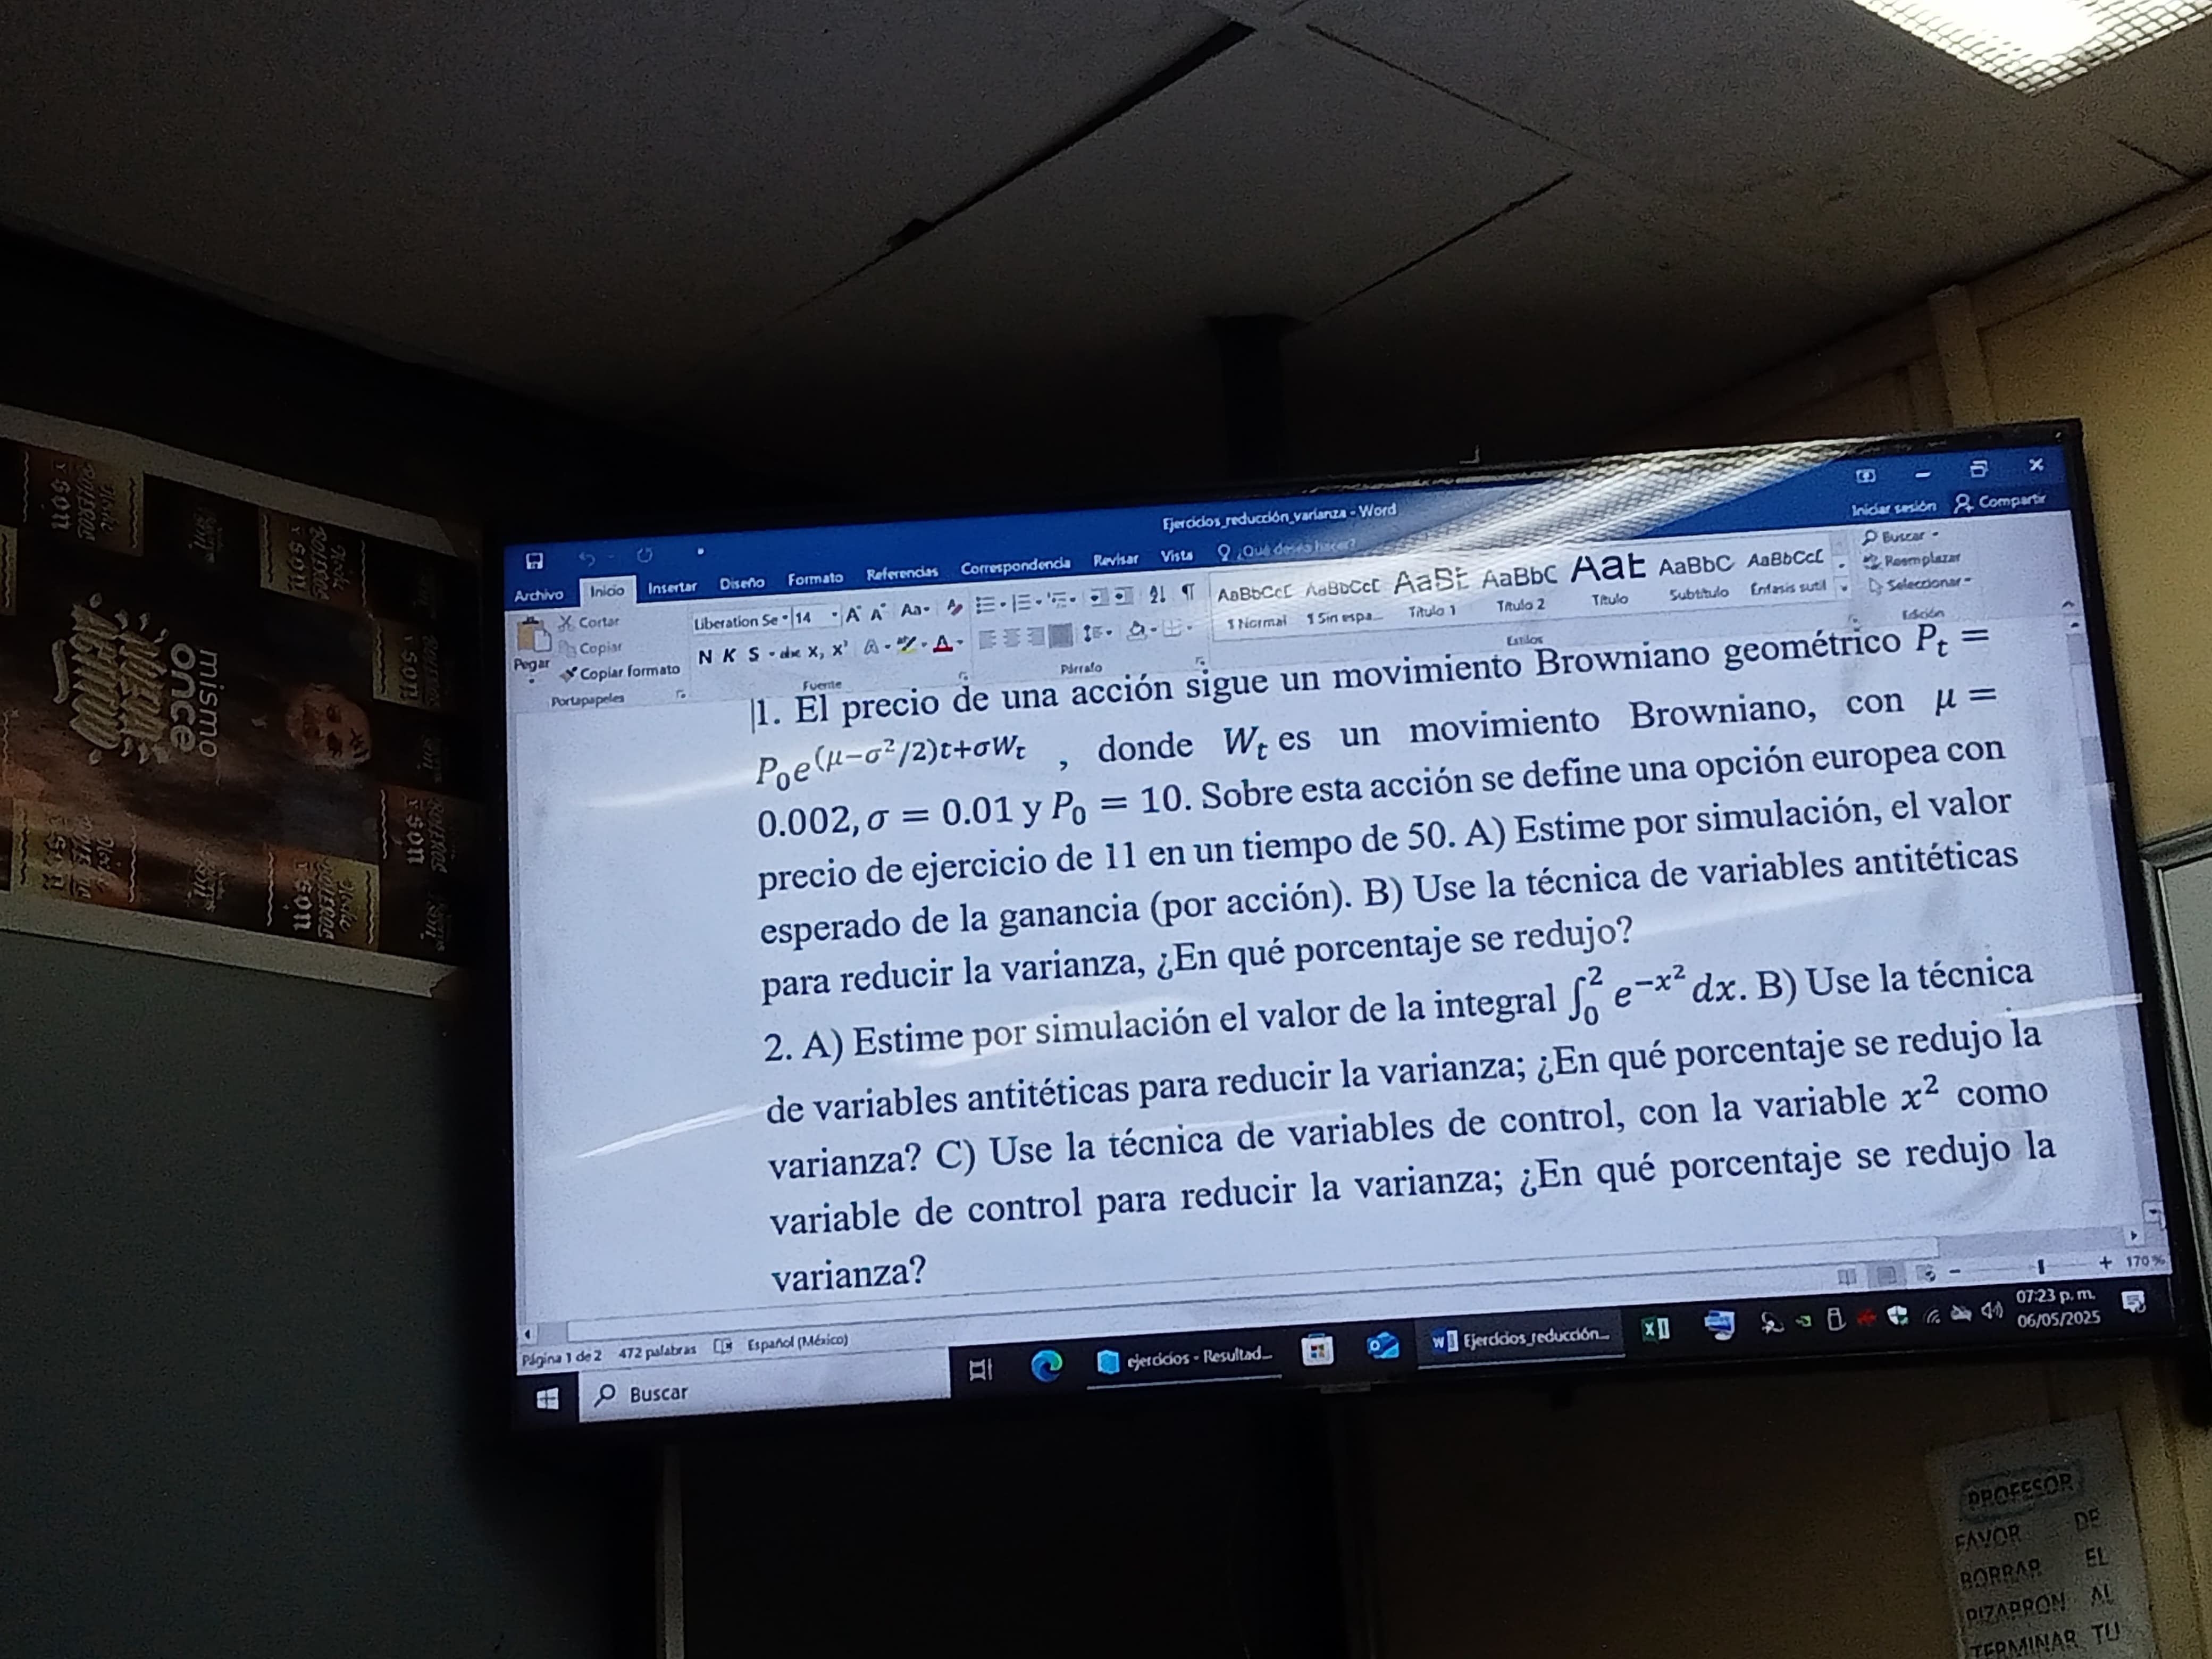

**EJERCICO 1 **

In [ ]:
from statistics import mean, variance
from random import gauss
from math import *

def Pt(mu,P0,sigma,T,w):
  pt=P0*exp((mu-(sigma**2)/2)*T +sigma*w)

  return  max(pt-11,0)

# Parámetros
P0 = 10             # Precio inicial de la acción
mu = 0.002          # Rendimiento esperado
sigma = 0.01        # Volatilidad
T = 50              # Tiempo de vencimiento en años
K = 11              # Precio de ejercicio (strike price)
n = 100000          # Número de simulaciones

Ganancia=[]
Gant=[]


for i in range(n):
  w=gauss(0, sqrt(T))
  Ganancia.append(Pt(mu,P0,sigma,T,w))

  Gant.append((Pt(mu,P0,sigma,T,w)+Pt(mu,P0,sigma,T,-w))/2)




m=mean(Ganancia)
v=variance(Ganancia)
ma=mean(Gant)
va=variance(Gant)

print(m,v)
print(ma,va)
print(100*(v-va)/v)

0.34136104404933837 0.24525828182137574
0.33823905459904885 0.06467318020498271
73.63058253336175


***EJERCICIO 2***

In [ ]:
from random import random
import numpy as np
from scipy.stats import pearsonr
from statistics import mean, variance

def f(x):
  return 2*np.exp(-x**2)
def g(x):
  return x**2

n=100000

l=[]
la=[]
lc=[]

for i in range(n):
  num = np.random.uniform(0, 2)
  l.append(f(num))
  la.append((f(num)+f(2-num))/2)
  lc.append(g(num))

m=mean(l)
v=variance(l)
#--------------------------ANTITETICAS ------------------------------#
ma=mean(la)
va=variance(la)
print("       VARIABLES ANTITÉTICAS")
print(m,v)
print(ma,va)
print(100*(v-va)/v)

#--------------------------DE CONTROL ------------------------------#
r=pearsonr(l,lc)
print("\n Reduccion de varianza con variable de control")
print(100*r[0]**2)


       VARIABLES ANTITÉTICAS
0.8833725016266948 0.47482634528824913
0.8819604920781341 0.010458999305682256
97.79730012677939

 Reduccion de varianza con variable de control
83.96412303558289


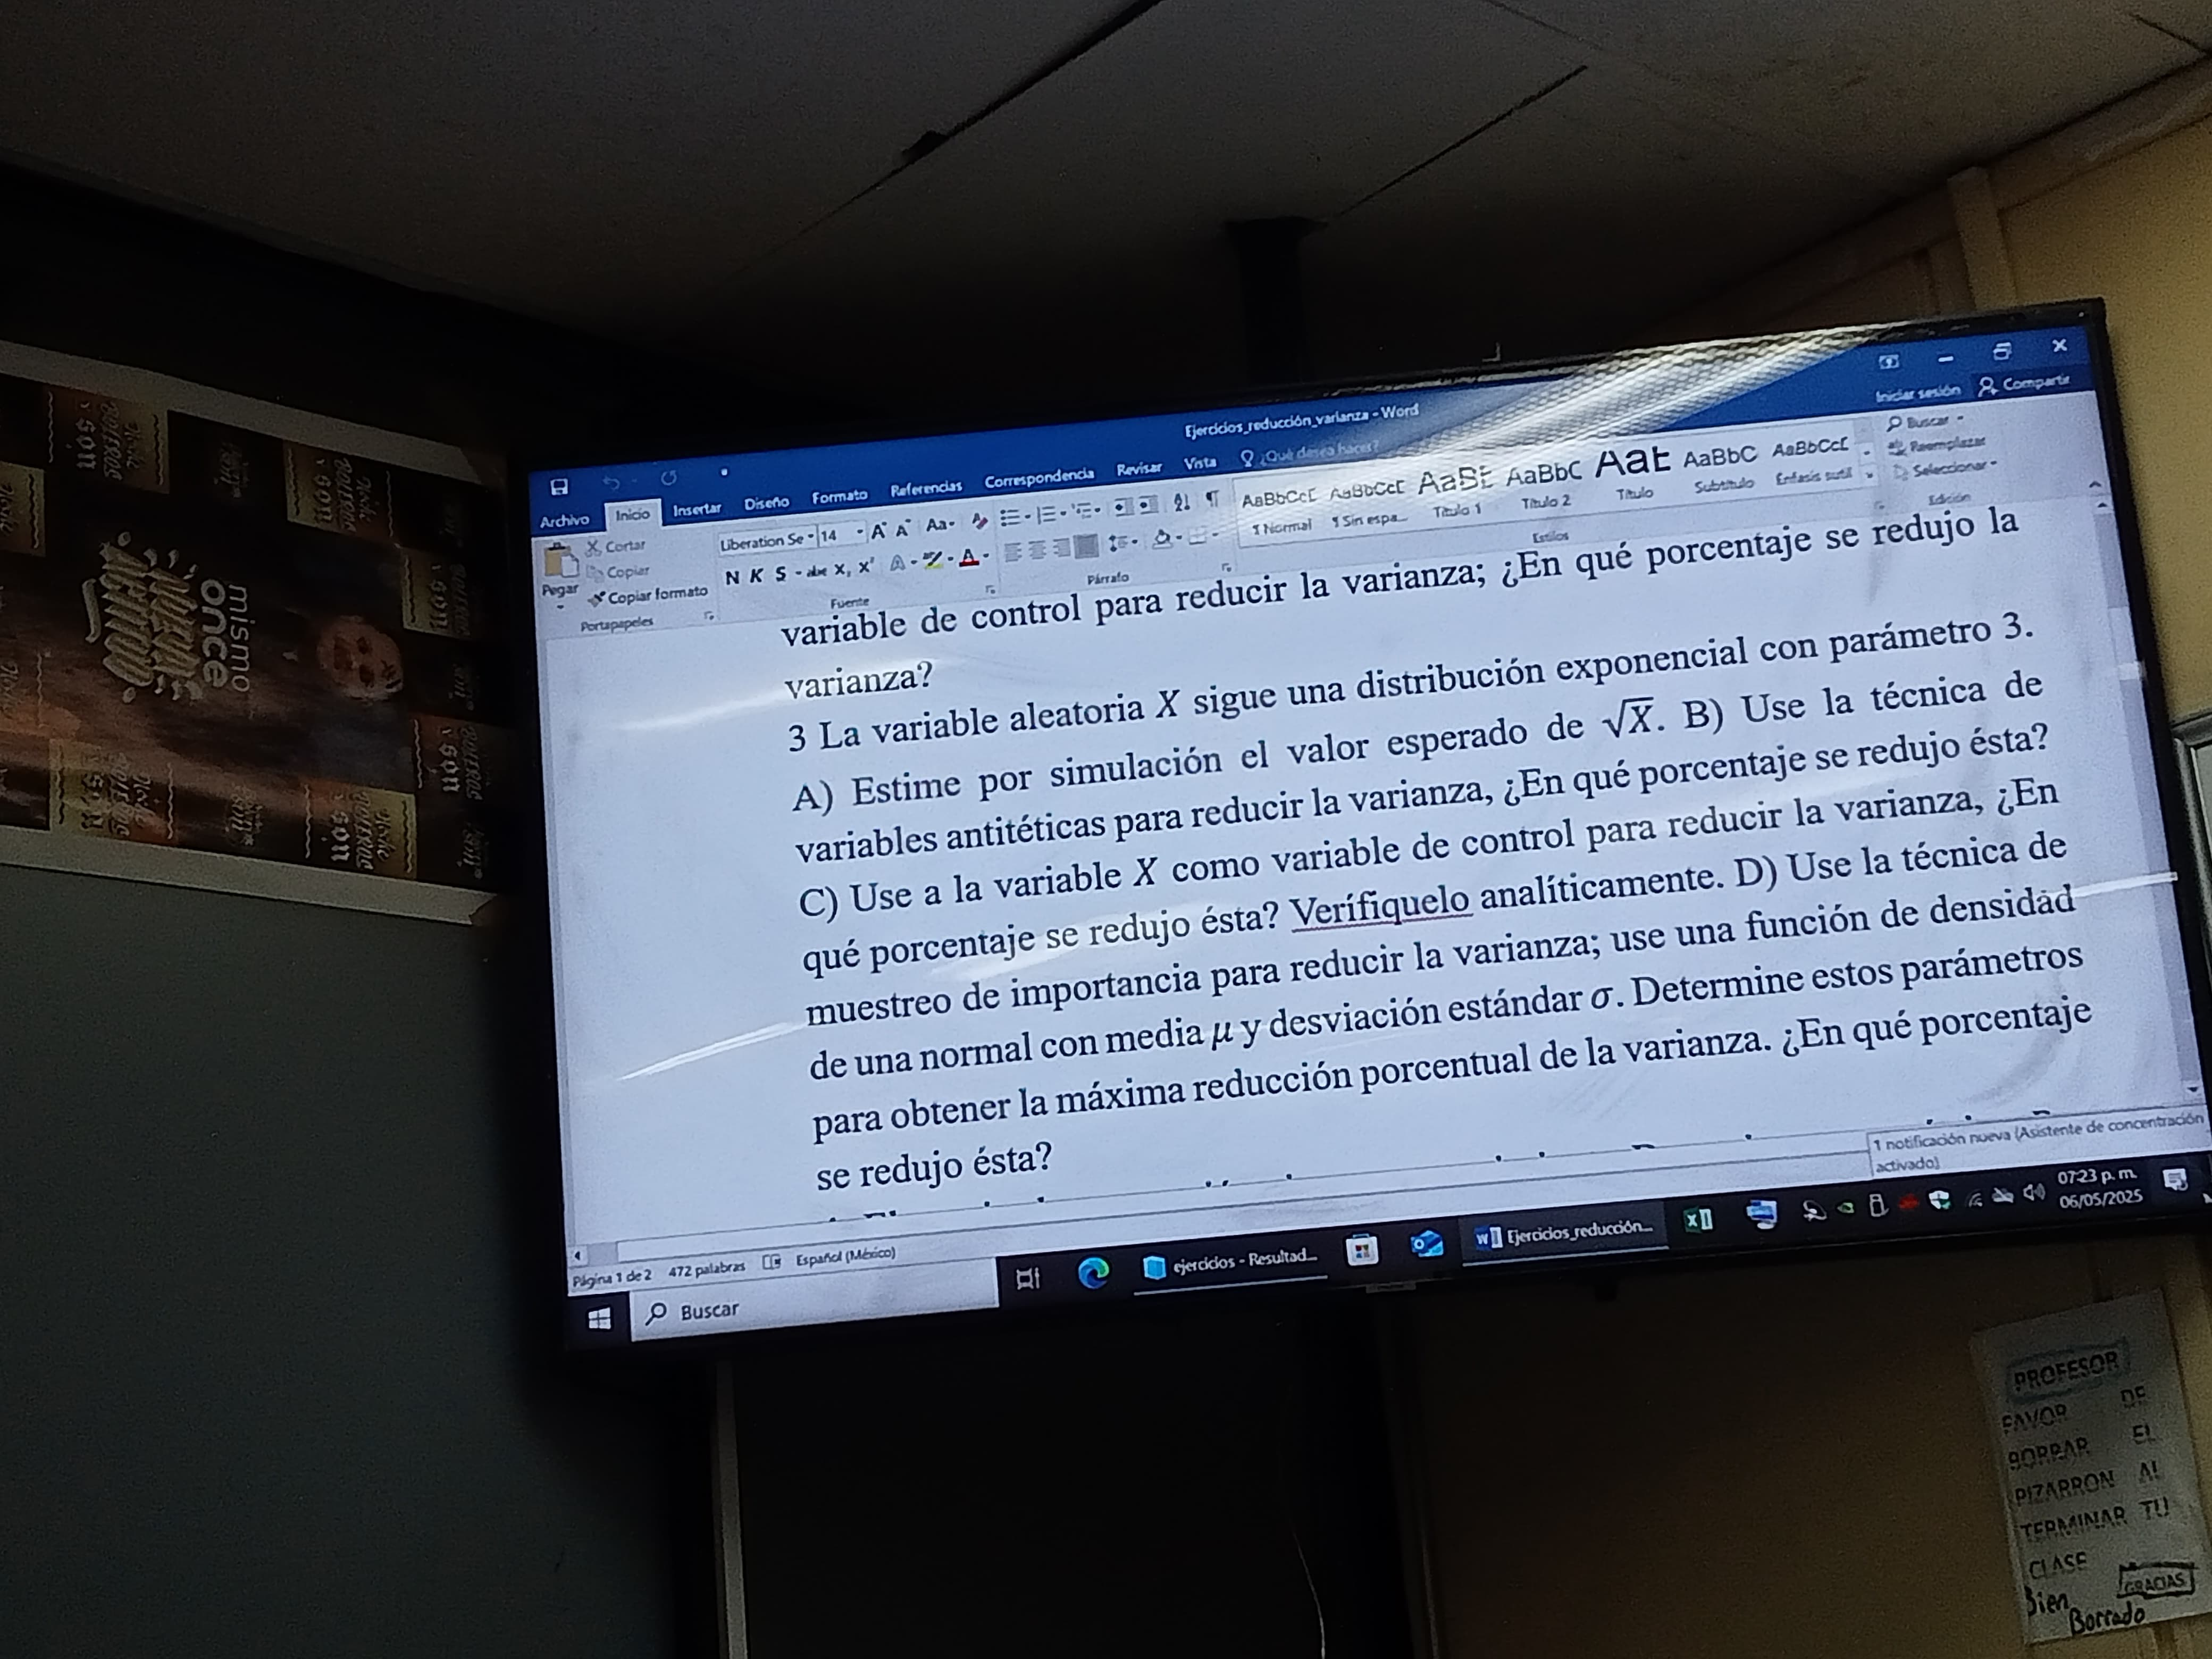

Variables antitéticas

In [ ]:
import numpy as np
from math import *
from random import random
from statistics import mean, variance
from scipy.stats import pearsonr

def f(x):
  return sqrt(x)

n=100000
l=[]
la=[]
lc=[]
for i in range(n):
  u=random()
  x=-log(1-u)/3
  x1=-log(u)/3
  la.append((f(x)+f(x1))/2)

  l.append(f(x))
  lc.append(x)

m=mean(l)
v=variance(l)
ma=mean(la)
va=variance(la)



print(m,v)
print("\n Variables antiteticas:")
print(ma,va)
print(100*(v-va)/v)

0.5141289497348437 0.0724172777872613

 Variables antiteticas:
0.5118953290255613 0.0019225107256786295
97.34523198824685


Variables de control


In [ ]:
r=pearsonr(l,lc)
vc=100*r[0]**2

print(f"Reduccion de varianza con variables de control:{vc}")

Reduccion de varianza con variables de control:91.58209977518835


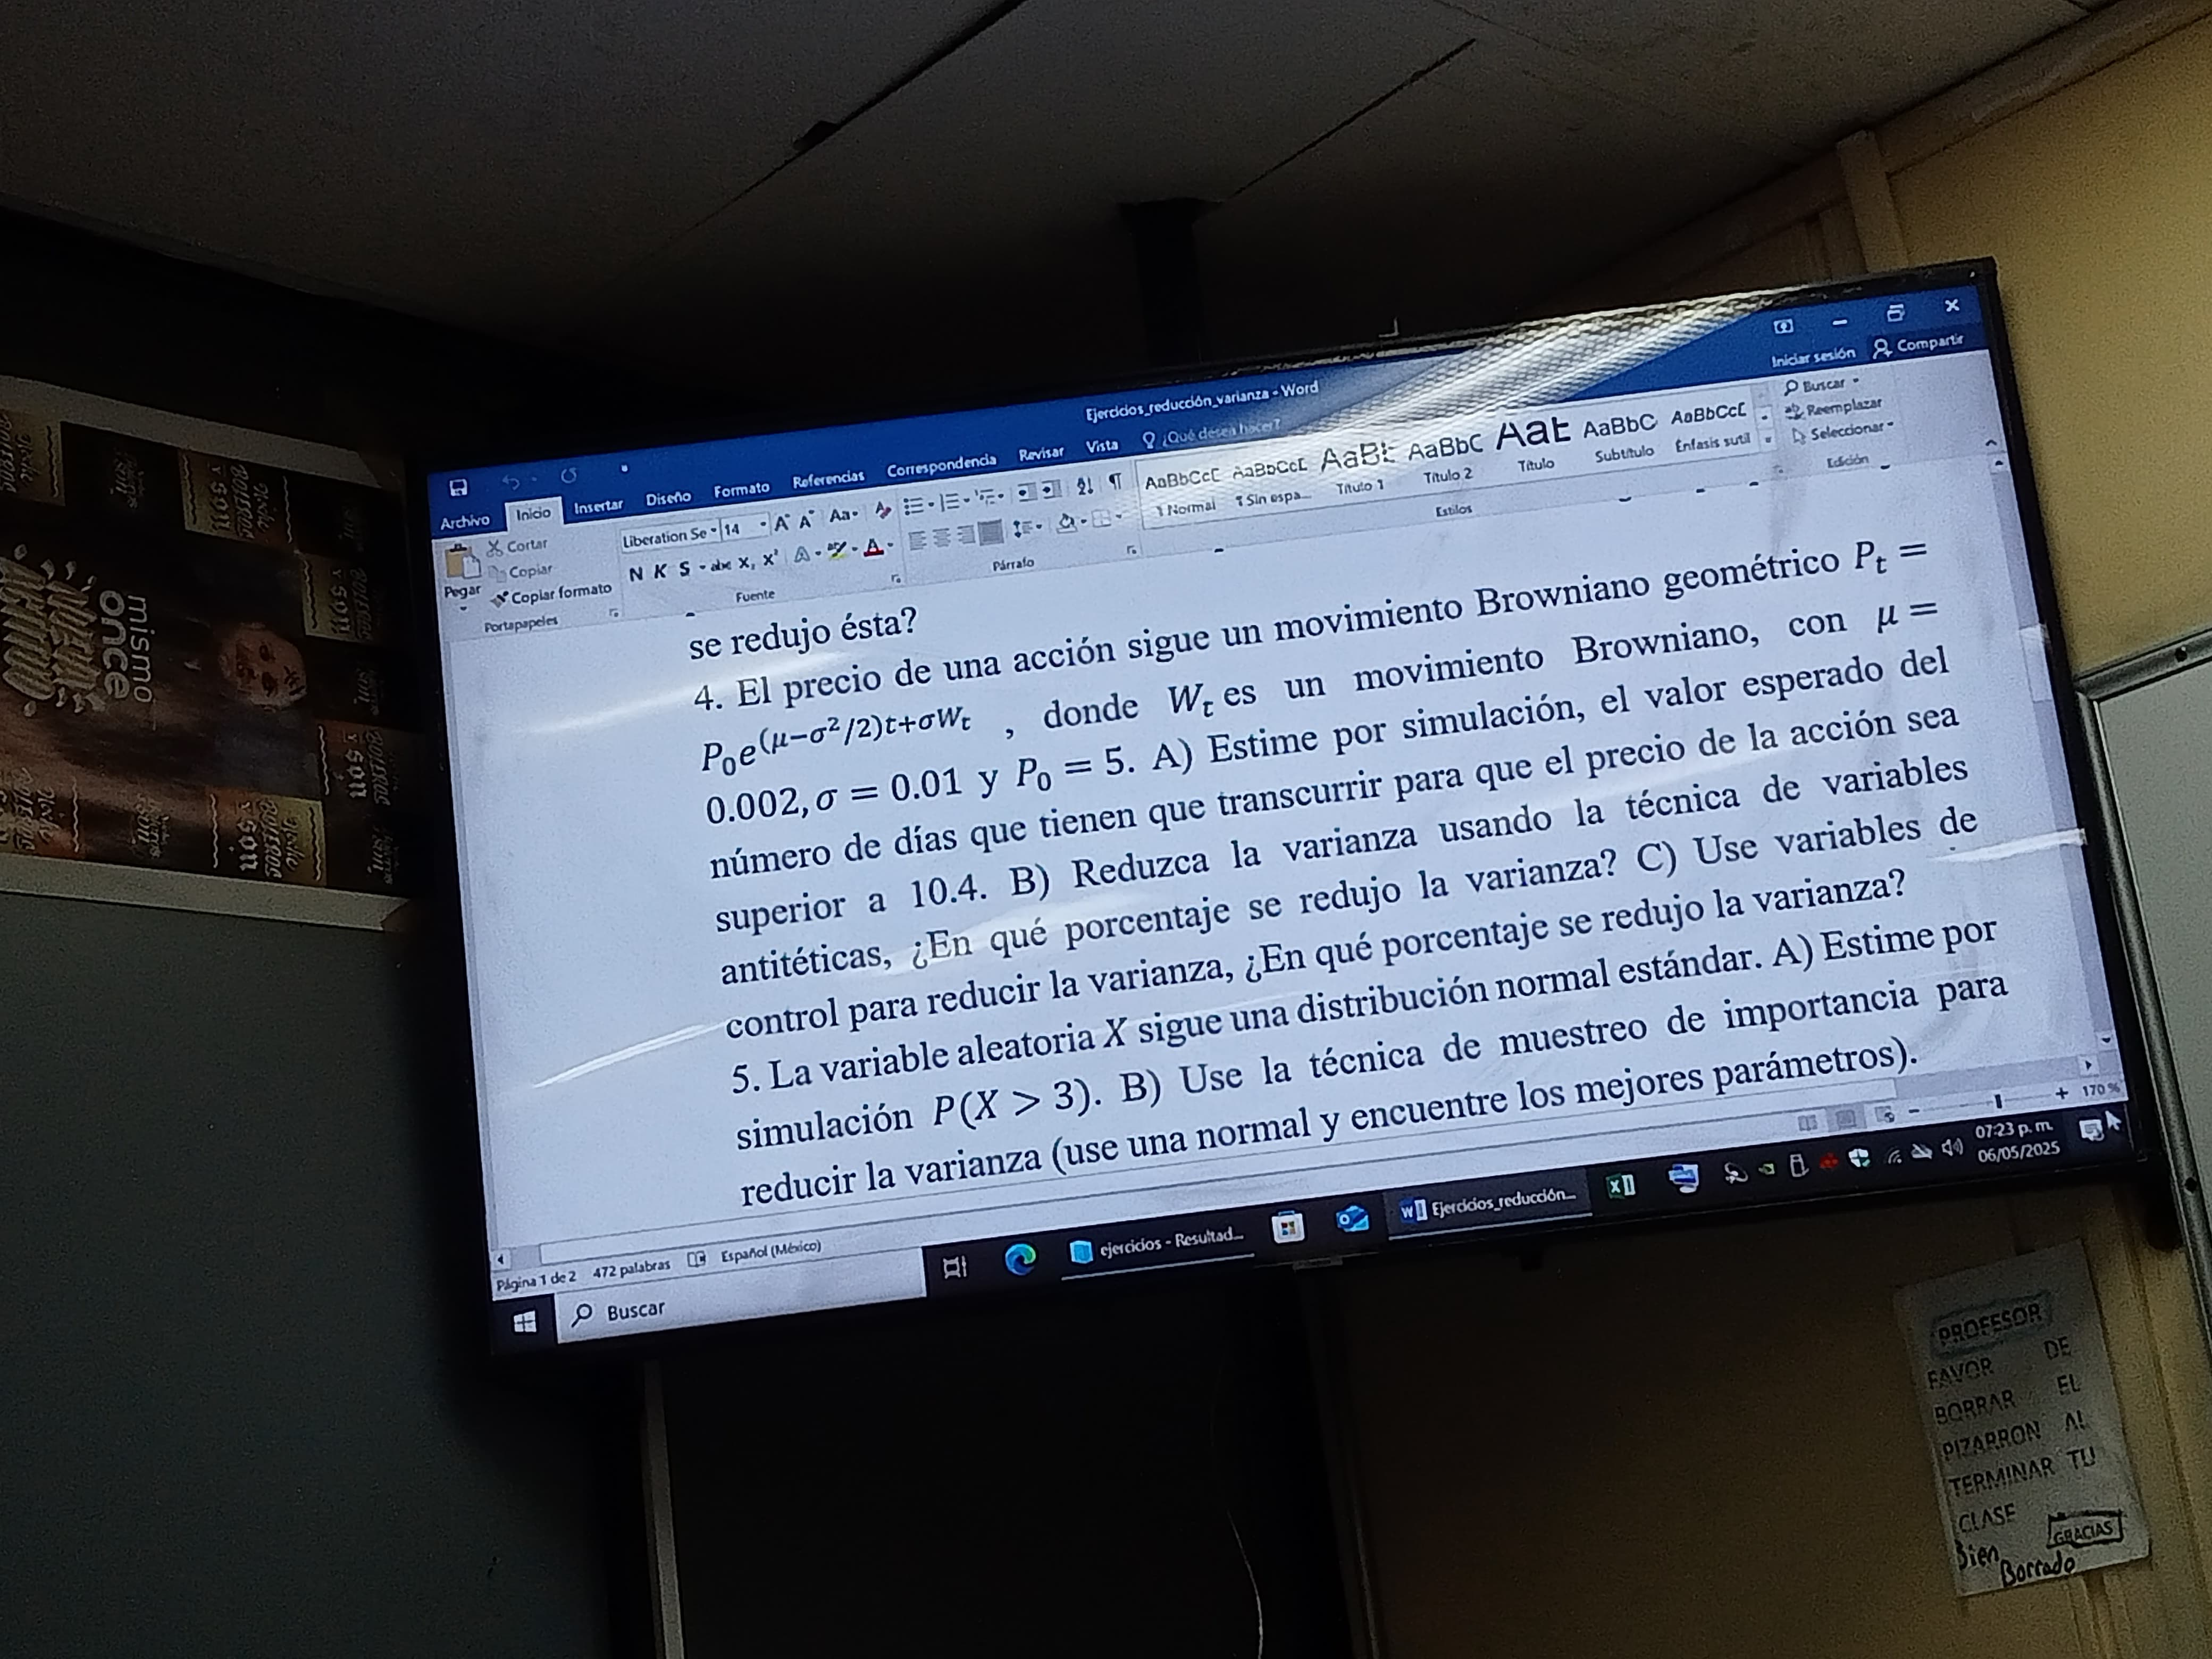

In [ ]:
#SOLUCIÓN
from math import exp,sqrt
from random import gauss
from statistics import mean,variance
from scipy.stats import pearsonr

def P(mu,sigma,p0,t,w):
   pt=p0*exp((mu-(sigma**2)/2)*t +sigma*w)
   return pt

mu=0.002
sigma=0.01
p0=5
p=10.4

n=100000
pt=0
t1=1
l=[]
la=[]
lc=[]
w=[]

for i in range(n):
  pt1=p0
  t1=1
  t2=1
#-------Calculo del promedio de dias
  while pt1 < p :
    w1=sqrt(t1)*gauss(0,1)

    w.append(w1)      #es solo para variable de control

    pt1=P(mu,sigma,p0,t1,w1)
    t1+=1
  l.append(t1)

  lc.append(w1)  #variable de control

#-------variables antiteticas usando -w como variable antitética
  pt2=p0
  t2=1
  while pt2<=p:
    w2=sqrt(t2)*gauss(0,1)
    pt2=P(mu,sigma,p0,t2,-w2)
    t2+=1
  la.append((t1+t2)/2)


r=pearsonr(l,lc)

m=mean(l)
v=variance(l)

ma=mean(la)
va=variance(la)

print(m,v)
print(ma,va)
print("Reduccion de varianza con variables de antiteticas",100*(v-va)/v)
print("Reduccion de varianza con variables de control",100*r[0]**2)


231.09363 587.3027764508645
231.11715 292.792328800788
Reduccion de varianza con variables de antiteticas 50.14627198424561
Reduccion de varianza con variables de control 31.387266428274934


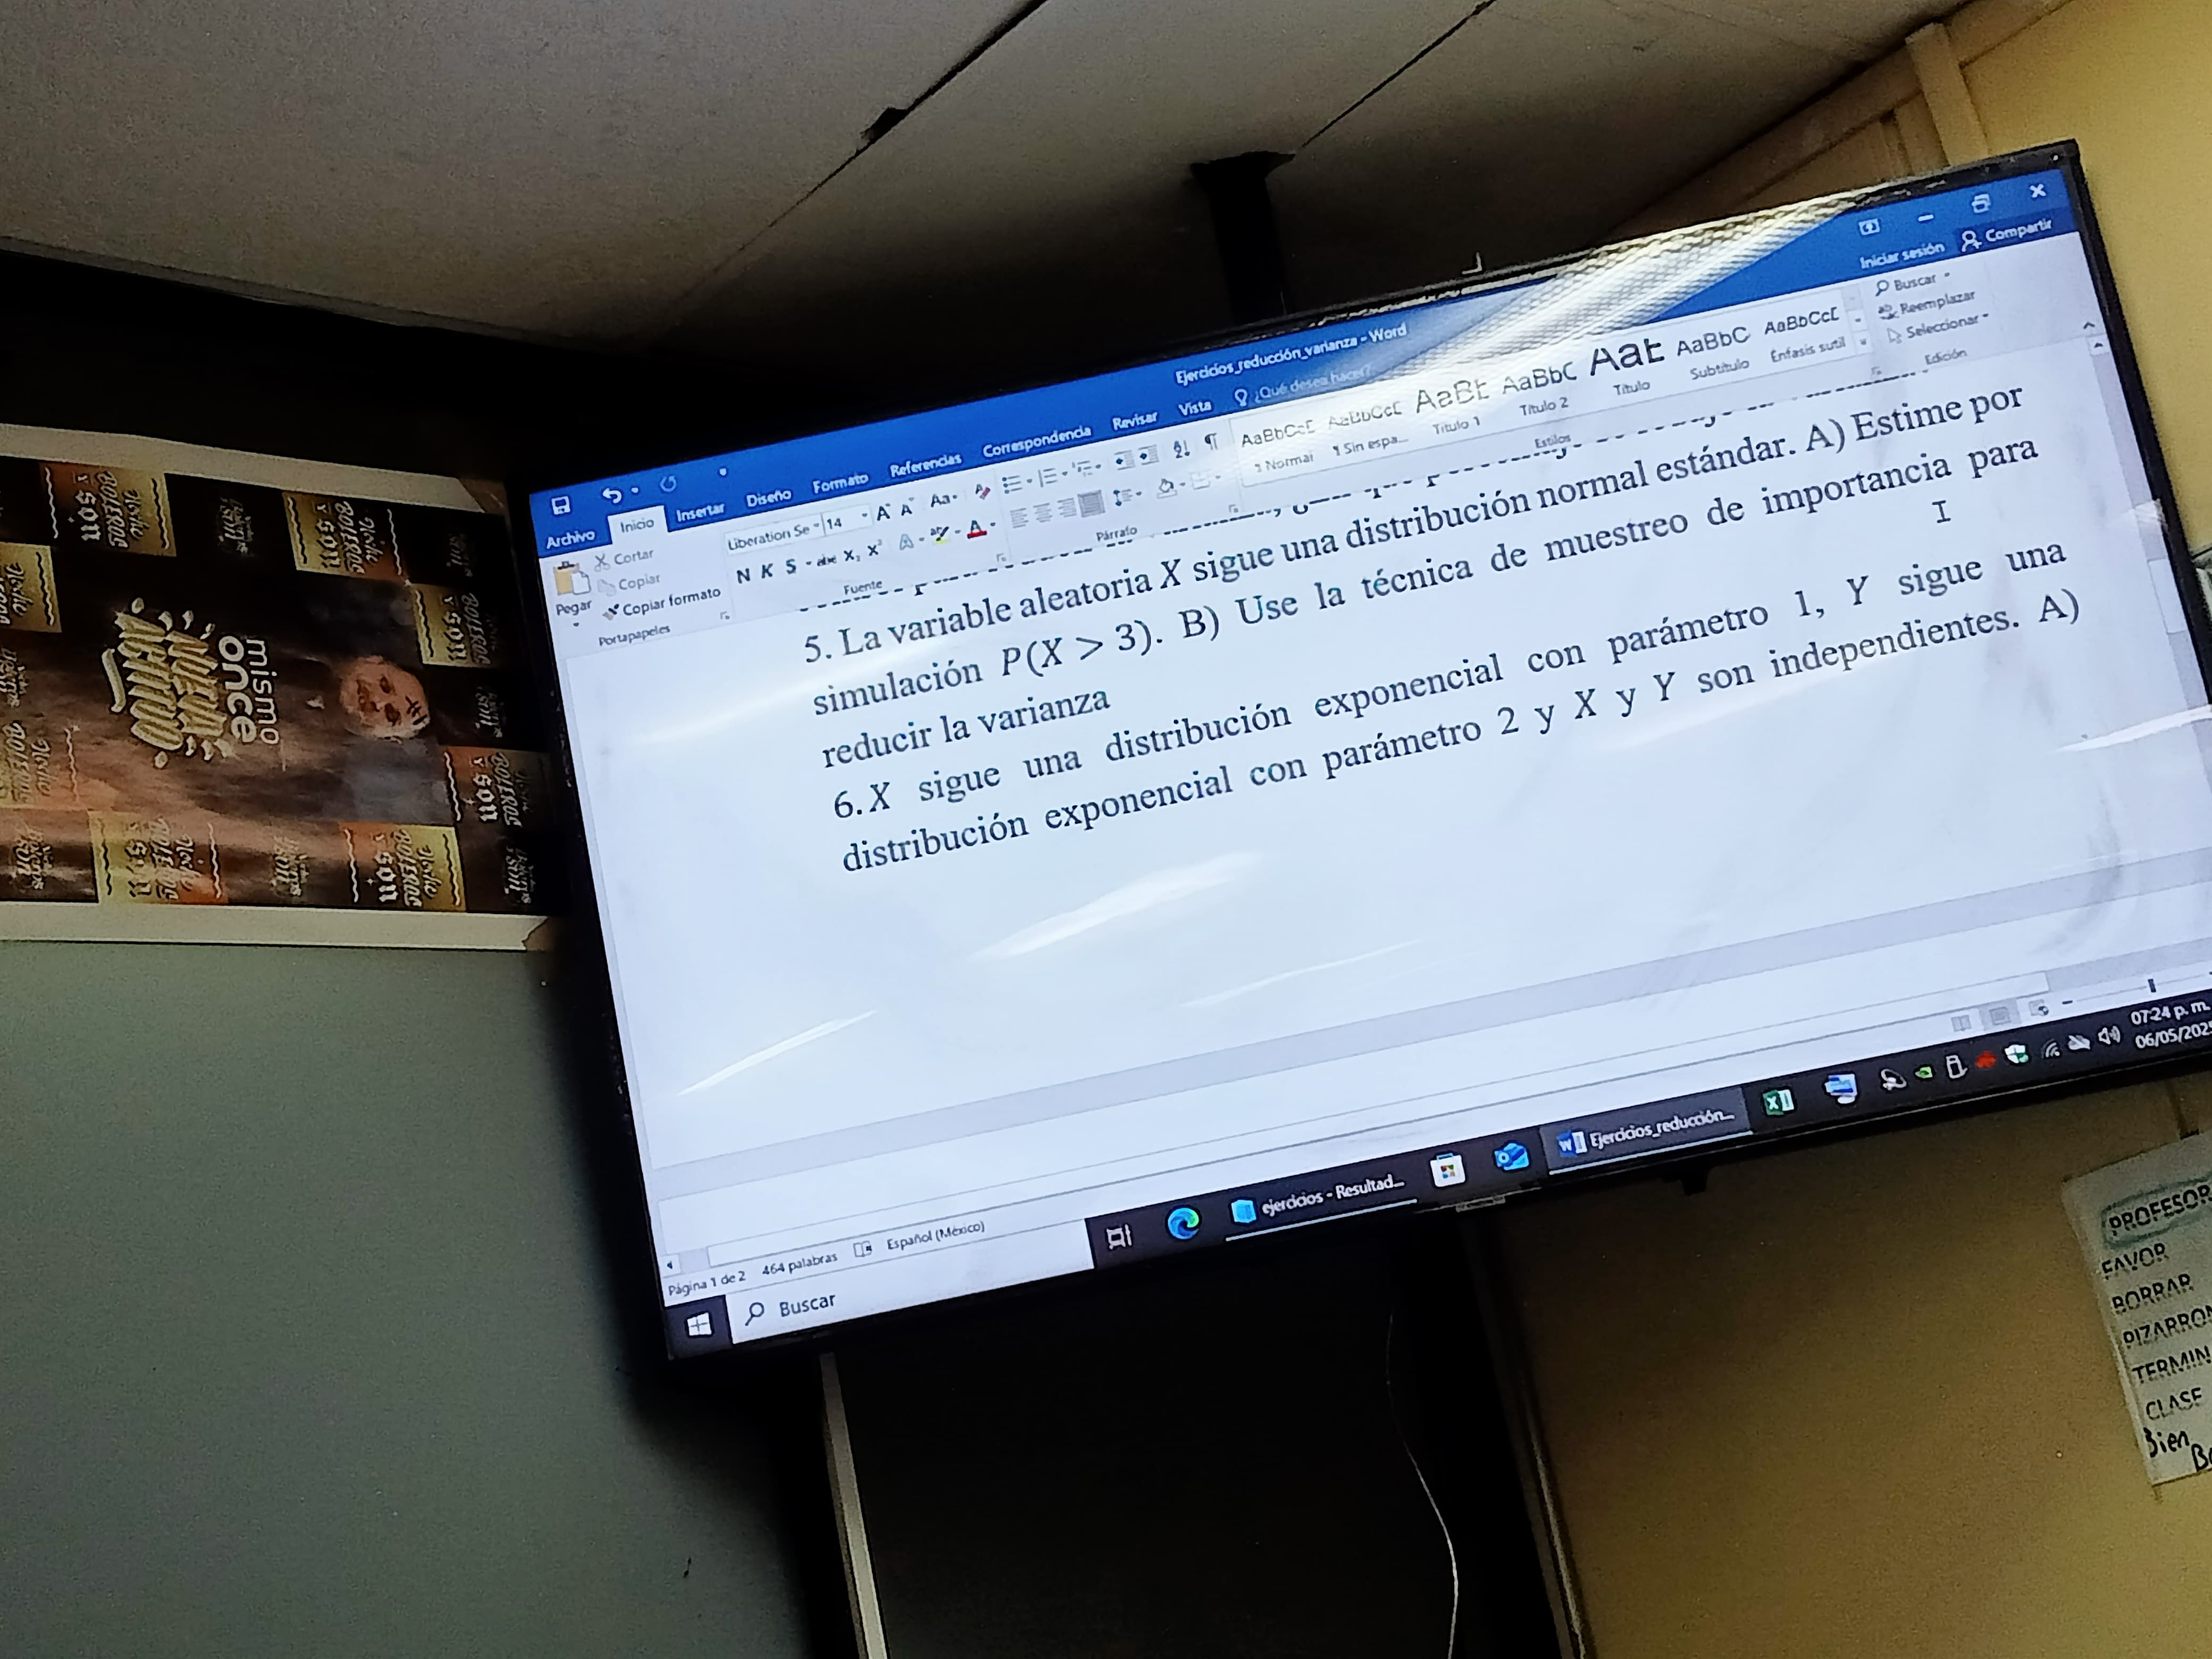

EJERCICIO 5

Parte A: P(X > 3) estimado = 0.001324
Parte B: Mejor λ = 3.500
Parte B: P(X > 3) estimado con muestreo de importancia = 0.001350
Parte B: Varianza del estimador = 6.92e-09


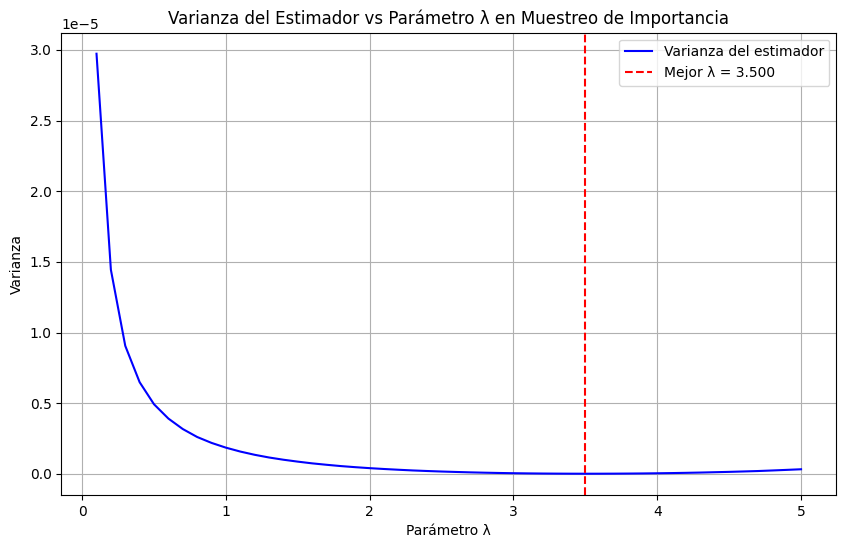

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Parte A: Estimación directa de P(X > 3)
np.random.seed(42)  # Para reproducibilidad
n_samples = 1000000
X = np.random.standard_normal(n_samples)
p_estimate = np.mean(X > 3)
print(f'Parte A: P(X > 3) estimado = {p_estimate:.6f}')

# Parte B: Muestreo de importancia con distribución exponencial truncada
def importance_sampling_exp(lambd, n_samples=100000):
    # Generar muestras de la distribución exponencial truncada en [3, ∞)
    Y = np.random.exponential(scale=1/lambd, size=n_samples)
    X_imp = 3 + Y  # Desplazamos para truncar en 3
    # Calcular los pesos: f(x)/g(x)
    f_x = stats.norm.pdf(X_imp)  # Densidad normal estándar
    g_x = lambd * np.exp(-lambd * Y)  # Densidad exponencial truncada
    weights = f_x / g_x
    # Estimador de P(X > 3)
    p_imp = np.mean(weights)
    var_imp = np.var(weights)
    return p_imp, var_imp

# Probar diferentes parámetros λ para encontrar el óptimo
lambd_values = np.linspace(0.1, 5.0, 50)
variances = []
estimates = []

for lambd in lambd_values:
    p_imp, var_imp = importance_sampling_exp(lambd)
    estimates.append(p_imp)
    variances.append(var_imp)

# Encontrar el λ con la menor varianza
best_idx = np.argmin(variances)
best_lambd = lambd_values[best_idx]
best_p_imp = estimates[best_idx]
best_var = variances[best_idx]

print(f'Parte B: Mejor λ = {best_lambd:.3f}')
print(f'Parte B: P(X > 3) estimado con muestreo de importancia = {best_p_imp:.6f}')
print(f'Parte B: Varianza del estimador = {best_var:.2e}')

# Gráfico de varianza vs λ
plt.figure(figsize=(10, 6))
plt.plot(lambd_values, variances, 'b-', label='Varianza del estimador')
plt.axvline(best_lambd, color='r', linestyle='--', label=f'Mejor λ = {best_lambd:.3f}')
plt.xlabel('Parámetro λ')
plt.ylabel('Varianza')
plt.title('Varianza del Estimador vs Parámetro λ en Muestreo de Importancia')
plt.legend()
plt.grid(True)
plt.show()

EJERCICIO 6 (Estime por simulacion P(X+Y>5) use la tecnica de condicionamiento para reducir la varianza )

In [ ]:
import random
from statistics import mean, variance
from math import *

def I(x,y):
  if x+y>5:
    return 1
  else:
    return 0

def f(y):
  if y<5:
    return exp(-(5-y))
  else:
    return 0

n=100000
l=[]
lr=[]
for i in range(n):
  x=random.expovariate(1)
  y=random.expovariate(2)
  l.append(I(x,y))
  lr.append(f(y))

m=mean(l)
v=variance(l)
mr=mean(lr)
vr=variance(lr)

print(m,v)
print(mr,vr)
print(100*(v-vr)/v)



0.01353 0.013347072570725708
0.01340786231454888 0.0002784983954600184
97.9134121434924


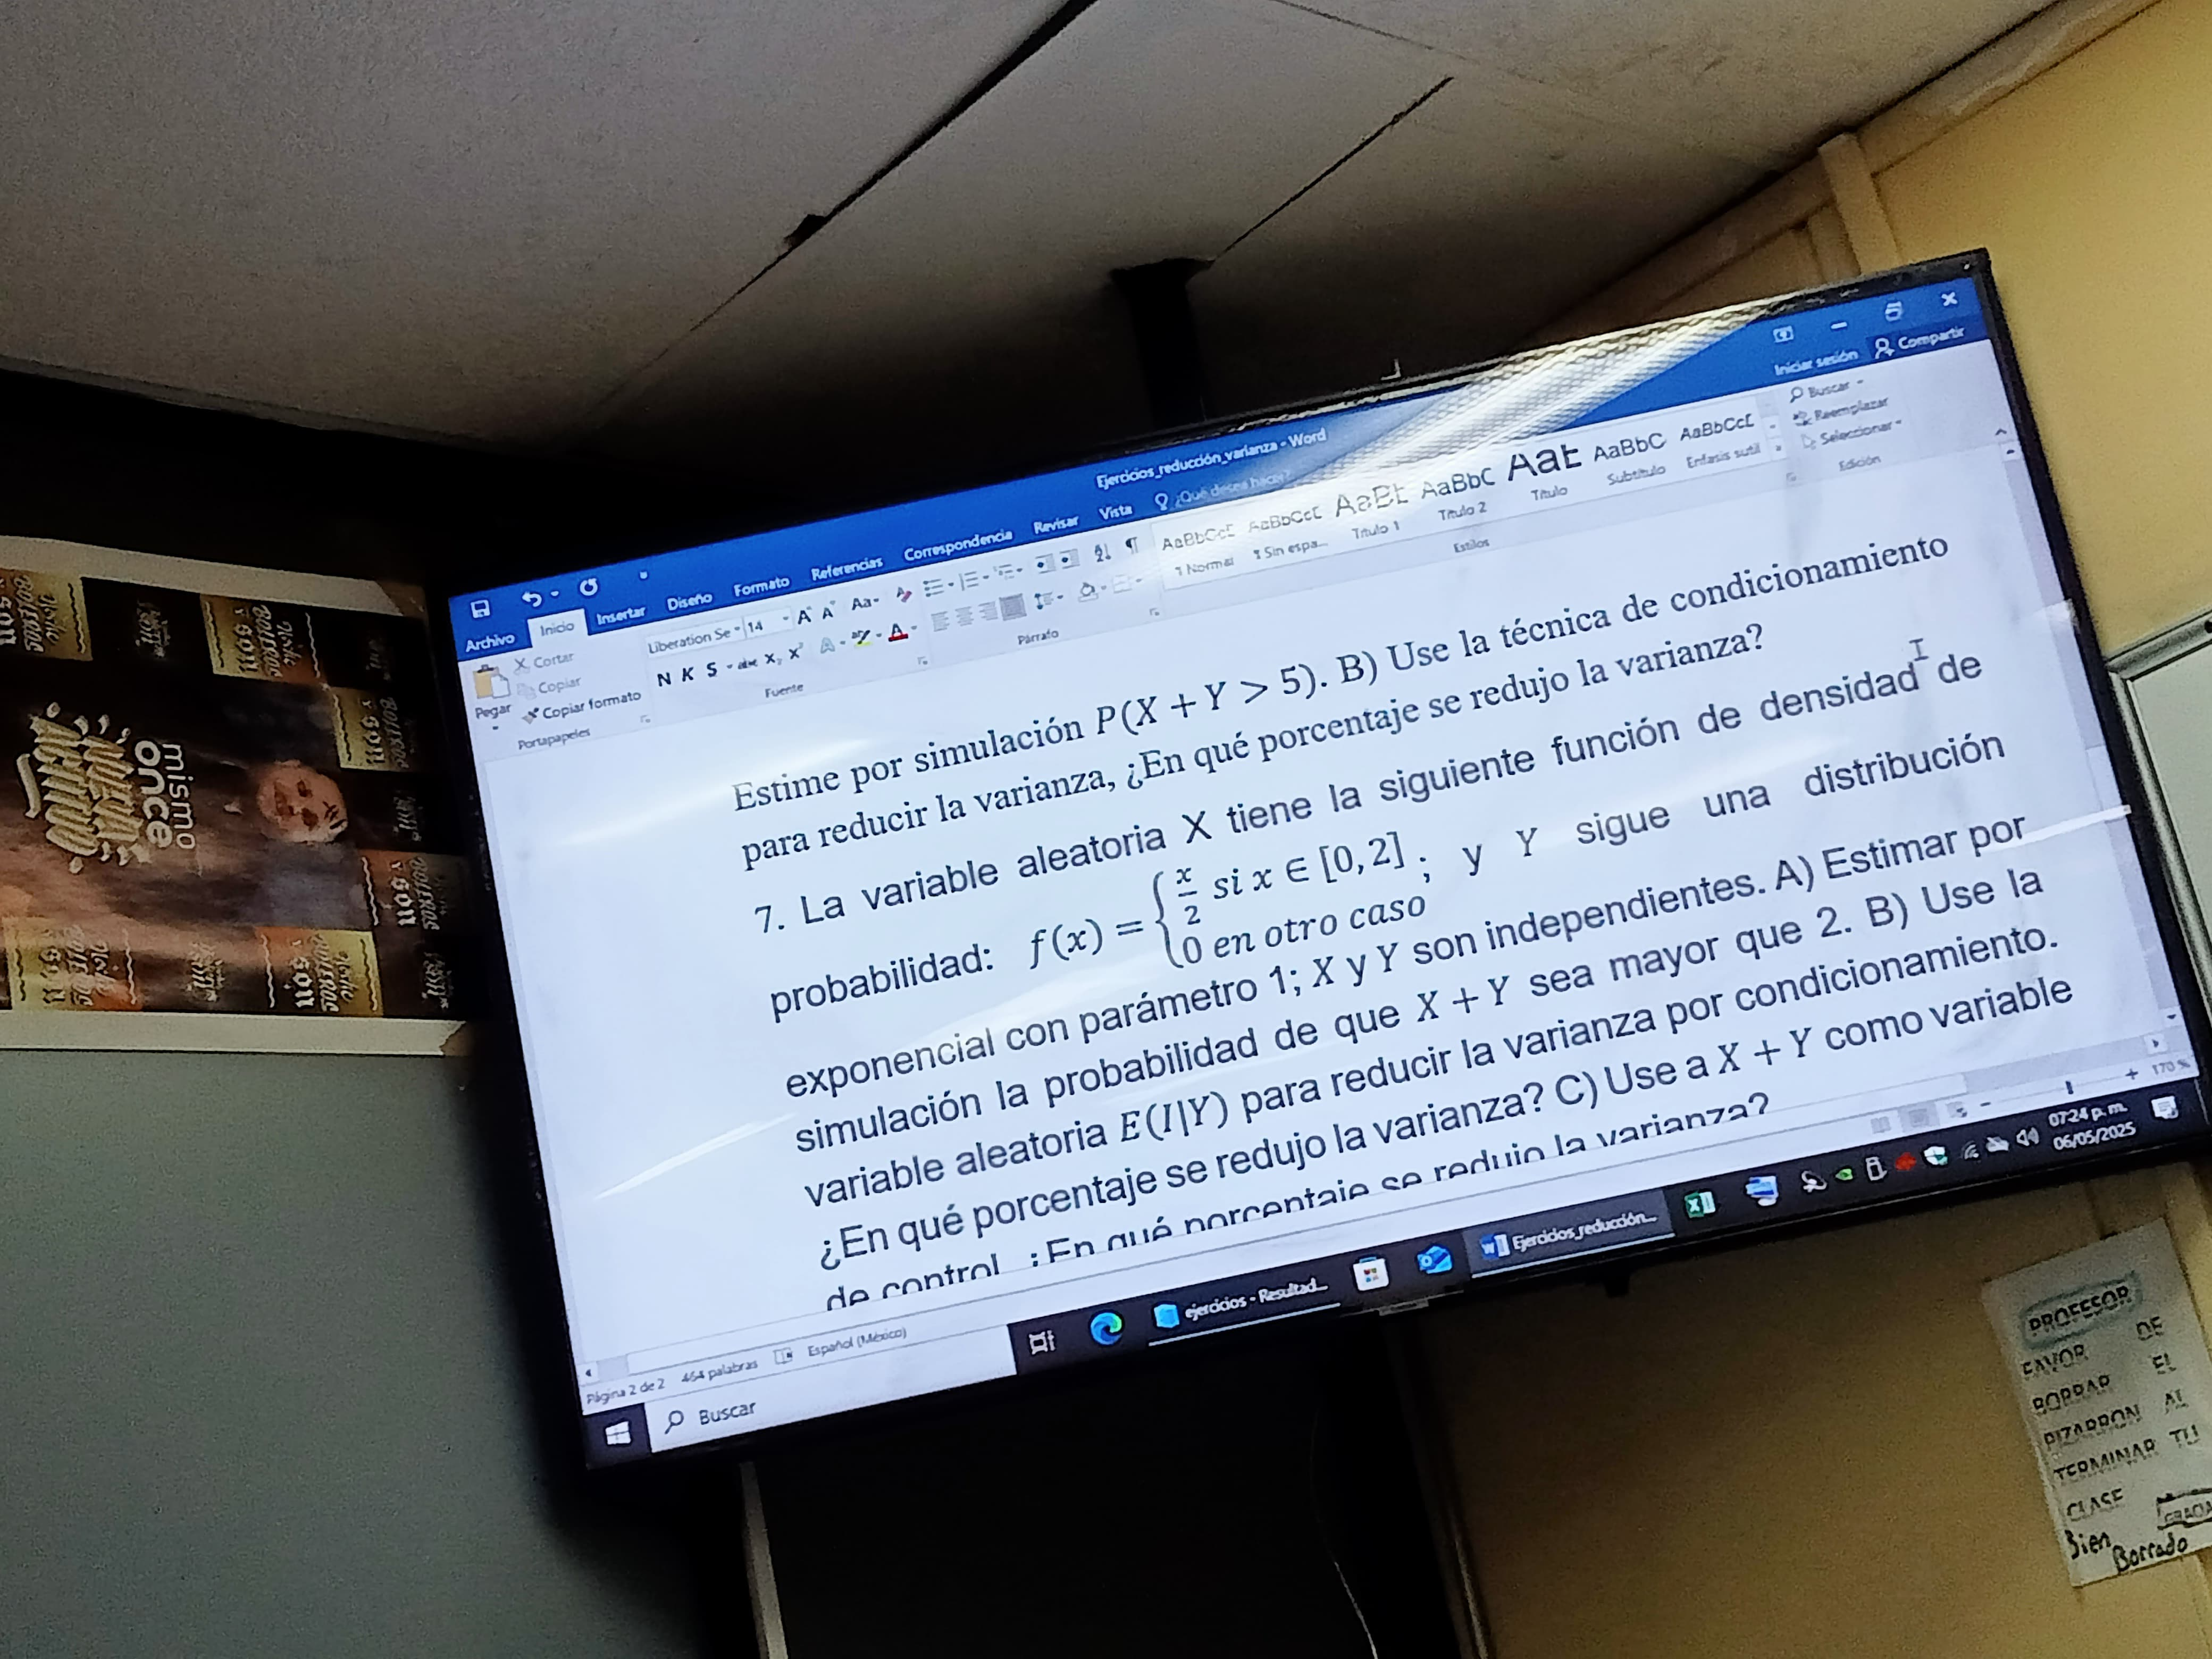

In [ ]:
import random
from math import *
from statistics import mean, variance

def f():
  u=random.uniform(0,1)
  return sqrt(u)

def I(x,y):
  if x+y>1.5:
    return 1
  else:
    return 0

def E(x):
    if 0<=1.5-x<=1 :
      return 1-(1.5-x)**2
    elif 1.5-x <0 :
      return 1
    else:
      return 0




n=1000000
l=[]
lr=[]


for i in range(n):
  x=random.expovariate(1)
  y=f()
  l.append(I(x,y))
  lr.append(E(x))


m=mean(l)
v=variance(l)
mr=mean(lr)
vr=variance(lr)

print(m,v)
print(mr,vr)
print("Reduccion de varianza por condicionamiento: ",100*(v-vr)/v)


0.447305 0.2472234841984842
0.44725168183877234 0.1905600595968448
Reduccion de varianza por condicionamiento:  22.919919919964794


In [ ]:
import random
from math import *
from scipy.stats import pearsonr

def f():
  u=random.uniform(0,1)
  return 2*(sqrt(u))

def I(x,y):
  if x+y>2:
    return 1
  else:
    return 0

def E(y):
    if 0<=2-y<=2 :
      return 1-((2-y)**2)/4
    elif 2-y<0 :
      return 1
    else:
      return 0
def control(x,y):
  return x+y




n=1000000
l=[]
lr=[]
lc=[]


for i in range(n):
  y=random.expovariate(1)
  x=f()
  l.append(I(x,y))
  lr.append(E(y))
  lc.append(control(x,y))


m=mean(l)
v=variance(l)
mr=mean(lr)
vr=variance(lr)

print(m,v)
print(mr,vr)
print("Reduccion de varianza por variables antitéticas: ",100*(v-vr)/v)


0.567895 0.24539051436551437
0.5676759728831767 0.11015043934835425
Reduccion de varianza por variables antitéticas:  55.11218531280193
